## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from src.dataset.make_dataset import Dataset
from src.features.build_features import *
from src.model.train_model import train_lgb, train_lgb_folds
from src.visualization.model_visualizer import TreeVisualizer

from sklearn.model_selection import (
    StratifiedKFold,
    KFold,
    RepeatedKFold,
    GroupKFold,
    GridSearchCV,
    train_test_split,
    TimeSeriesSplit,
)

In [3]:
ds = Dataset()
ds.load_raw(30000)

Mem. usage decreased to 54.44 Mb (45.9% reduction)
Mem. usage decreased to 54.41 Mb (45.8% reduction)


## Sandbox

In [4]:
build_processed_dataset(ds)

c:\workspaceperso\kaggle\ieee-fraud-detection\src\features\build_features.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if nan_constant in lbl.classes_:


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(ds.X_train, ds.y_train, test_size=0.3, random_state=0)

In [8]:
params = {
    'boosting_type': 'gbdt',
    'max_depth' : -1,
    'objective': 'binary',
    'nthread': -1, # Updated from nthread
    'num_leaves': 64,
    'learning_rate': 0.05,
    'max_bin': 512,
    'subsample_for_bin': 200,
    'subsample': 1,
    'subsample_freq': 1,
    'colsample_bytree': 0.8,
    'reg_alpha': 5,
    'reg_lambda': 10,
    'min_split_gain': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 5,
    'scale_pos_weight': 1,
    'num_class' : 1,
    'metric' : 'auc'
}

In [20]:
clf = train_lgb(X_train, y_train, X_valid, y_valid, params)

Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.971121	training's auc: 0.971121	valid_1's auc: 0.90588	valid_1's auc: 0.90588
[200]	training's auc: 0.977825	training's auc: 0.977825	valid_1's auc: 0.912591	valid_1's auc: 0.912591
[300]	training's auc: 0.977825	training's auc: 0.977825	valid_1's auc: 0.912591	valid_1's auc: 0.912591
Early stopping, best iteration is:
[162]	training's auc: 0.977825	training's auc: 0.977825	valid_1's auc: 0.912591	valid_1's auc: 0.912591


In [21]:
sample = ds.X_train.sample(1000, random_state=314)

In [23]:
lgb_tv = TreeVisualizer(clf, sample)

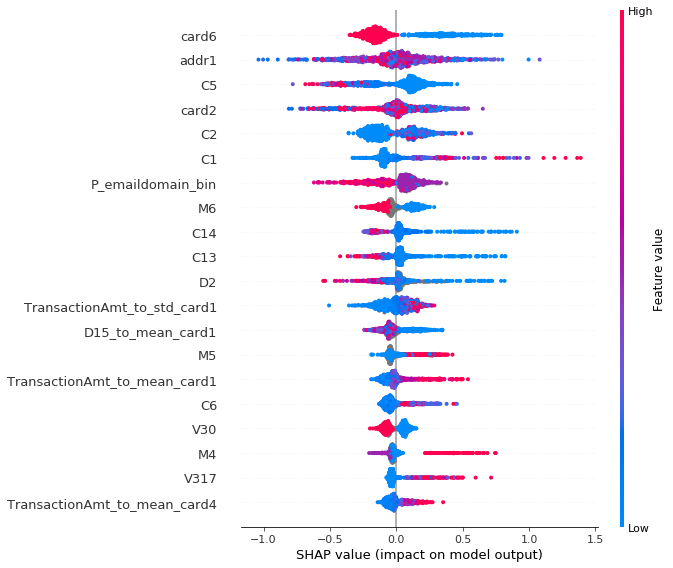

In [25]:
lgb_tv.summary_plot()

In [16]:
train_lgb_folds(ds)

Fold 1 started at Sun Aug 11 09:23:46 2019
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.999045	training's auc: 0.999045	valid_1's auc: 0.897155	valid_1's auc: 0.897155
[200]	training's auc: 0.999996	training's auc: 0.999996	valid_1's auc: 0.905106	valid_1's auc: 0.905106
[300]	training's auc: 1	training's auc: 1	valid_1's auc: 0.908466	valid_1's auc: 0.908466
[400]	training's auc: 1	training's auc: 1	valid_1's auc: 0.907834	valid_1's auc: 0.907834
Early stopping, best iteration is:
[253]	training's auc: 1	training's auc: 1	valid_1's auc: 0.908483	valid_1's auc: 0.908483
Fold 2 started at Sun Aug 11 09:24:24 2019
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.999348	training's auc: 0.999348	valid_1's auc: 0.89838	valid_1's auc: 0.89838
[200]	training's auc: 0.999998	training's auc: 0.999998	valid_1's auc: 0.893046	valid_1's auc: 0.893046
[300]	training's auc: 1	training's auc: 1	valid_1's auc: 0.890359	val

{'oof': array([[0.00251195],
        [0.00379201],
        [0.00139336],
        ...,
        [0.00082815],
        [0.00355993],
        [0.00046995]]), 'prediction': array([[0.00525096],
        [0.01072443],
        [0.00871113],
        ...,
        [0.00714342],
        [0.01669791],
        [0.0126176 ]]), 'scores': [0.9087311801788731,
  0.8985928170149414,
  0.8826558645581782,
  0.8620320037473699,
  0.9268108865881761]}